<a href="https://colab.research.google.com/github/aalfonso89/codespaces-jupyter/blob/main/ProyectoDS_ParteI_ALFONSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Visualizaciones**

Este dataset cuenta con las ventas realizadas por una compañias de seguros en el año 2020, 2021 y 2022. Contando con diferentes datos de la venta, se planteará un modelo de regresión para que, brindando distintos parámetros, se pueda obtener el importe de la póliza. 
Las variables que considero dependientes para poder relacionar con el importe de la póliza son:
- Producto
- Edad del tomador
- Sexo del tomador
- Tipo de persona del tomador
- Cantidad de asegurados

A partir de esos datos, se intentará obtener el importe de la póliza.

Como preguntas problema relacionadas con las variables, es interesante saber cuan dependiente es cada una del precio de la póliza, cuál es la mas relacionada con el precio de la póliza y si existe alguna combinacion de variables que marque alguna tendencia.

Se planteó poder modificar el dataset para poder incrporar algun dato más que pueda inferir el premio, pero por el momento no lo modifiqué. 

In [36]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Archivos DataScience/ventas2020-2022.csv',sep=';', on_bad_lines='skip')
df


,PRODUCTO,OPERACIÓN,CODIGO TOMADOR,NOMBRE TOMADOR,CODIGO DE PRODUCTOR,FECHA DE EMISION,FECHA INICIO VIGENCIA,FECHA FIN VIG,DURACION DE POLIZA,PRODUCTO ANTERIOR,...,MEDIO DE PAGO,PREMIO,CANTIDAD DE ASEGURADOS,TIPO DE PERSONA,FECHA NACIMIENTO,SEXO,TIPO DOC,NRO DOC,DOMICILIO,TELEFONO
0,125,17863,25626,FERRER EMILDA OFELIA | 043953157,1,31/7/2020,1/8/2020,31/7/2021,12,125,...,5,24.24,1,F,12/7/1940,1,4.0,3.953157e+06,NaN,NaN
1,125,18198,25626,FERRER EMILDA OFELIA | 043953157,1,31/7/2021,1/8/2021,31/7/2022,12,125,...,5,24.24,1,F,12/7/1940,2,4.0,3.953157e+06,NaN,NaN
2,125,18507,25626,FERRER EMILDA OFELIA | 043953157,1,31/7/2022,1/8/2022,31/7/2023,12,125,...,5,16.16,1,F,12/7/1940,1,4.0,3.953157e+06,NaN,NaN
3,131,34827,15288,CALIVARES MARCELO GABRIEL | 2120247403834,24,31/1/2020,1/2/2020,31/1/2021,12,131,...,5,23870.68,2,F,20/11/1975,2,21.0,2.024740e+10,NaN,NaN
4,131,35460,13021,BARKUDI DIEGO ALEJANDRO | 0426045967,32,31/1/2020,1/2/2020,31/1/2021,12,131,...,5,2152.71,1,F,18/10/1977,1,4.0,2.604597e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89139,208,92,2857,INST.DE VIV.DE LA FUERZA AEREA (IVIFA) | 20305...,1,30/9/2022,1/10/2022,30/9/2023,12,208,...,4,3222.49,1,J,1000-01-01,0,20.0,3.058481e+10,AVDA.PTE.GRAL.J.A.ROCA 636 1 - (1067) CAPITAL...,1143435961
89140,208,93,2857,INST.DE VIV.DE LA FUERZA AEREA (IVIFA) | 20305...,1,30/9/2022,1/10/2022,30/9/2023,12,208,...,4,786642.51,1,J,1000-01-01,0,20.0,3.058481e+10,AVDA.PTE.GRAL.J.A.ROCA 636 1 - (1067) CAPITAL...,1143435961
89141,228,195,59982,SMSV INSTITUCION MUTUALISTA | 2030527516737,1,6/2/2020,7/2/2020,31/5/2020,999,0,...,4,4922.25,3,J,1000-01-01,0,20.0,3.052752e+10,Av. Cordoba 1674 - (10190) CAPITAL FEDERAL -...,1141294000
89142,228,1051,59982,SMSV INSTITUCION MUTUALISTA | 2030527516737,1,11/4/2021,12/4/2021,11/7/2021,3,0,...,8,9793.76,4,J,1000-01-01,0,20.0,3.052752e+10,Av. Cordoba 1674 - (10190) CAPITAL FEDERAL -...,1141294000


Teniendo en cuenta las variables que queremos analizar, debemos generar un dataframe reducido del original,  solo tomando las personas físicas para el analisis.

**Análisis Univariado**

En este gráfico de barras se intenta mostrar una relación entre la edad del tomador de la póliza y el premio acumulado de las mismas para esa edad. Vemos que existe un pico entre los 23 y 26 años para ambos sexos, y luego tiene una tendencia descendente, donde a mayor edad, menor es el premio que acumula.
Podemos ver entonces que en ese rango de 20-30 es donde la compañía encuentra su mejor caudal de premio.

Por otro lado vemos que a partir de los 50 años, se iguala el premio para ambos sexos, mientras que hasta los 50 años el premio es mayor para el sexo masculino (codigo 1).

<ipython-input-37-077bd22cab7d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['FECHA NACIMIENTO'] = [datetime.strptime(fecha, '%d/%m/%Y').date() for fecha in df_a['FECHA NACIMIENTO']]
<ipython-input-37-077bd22cab7d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['FECHA DE EMISION'] = [datetime.strptime(fecha, '%d/%m/%Y').date() for fecha in df_a['FECHA DE EMISION']]
<ipython-input-37-077bd22cab7d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

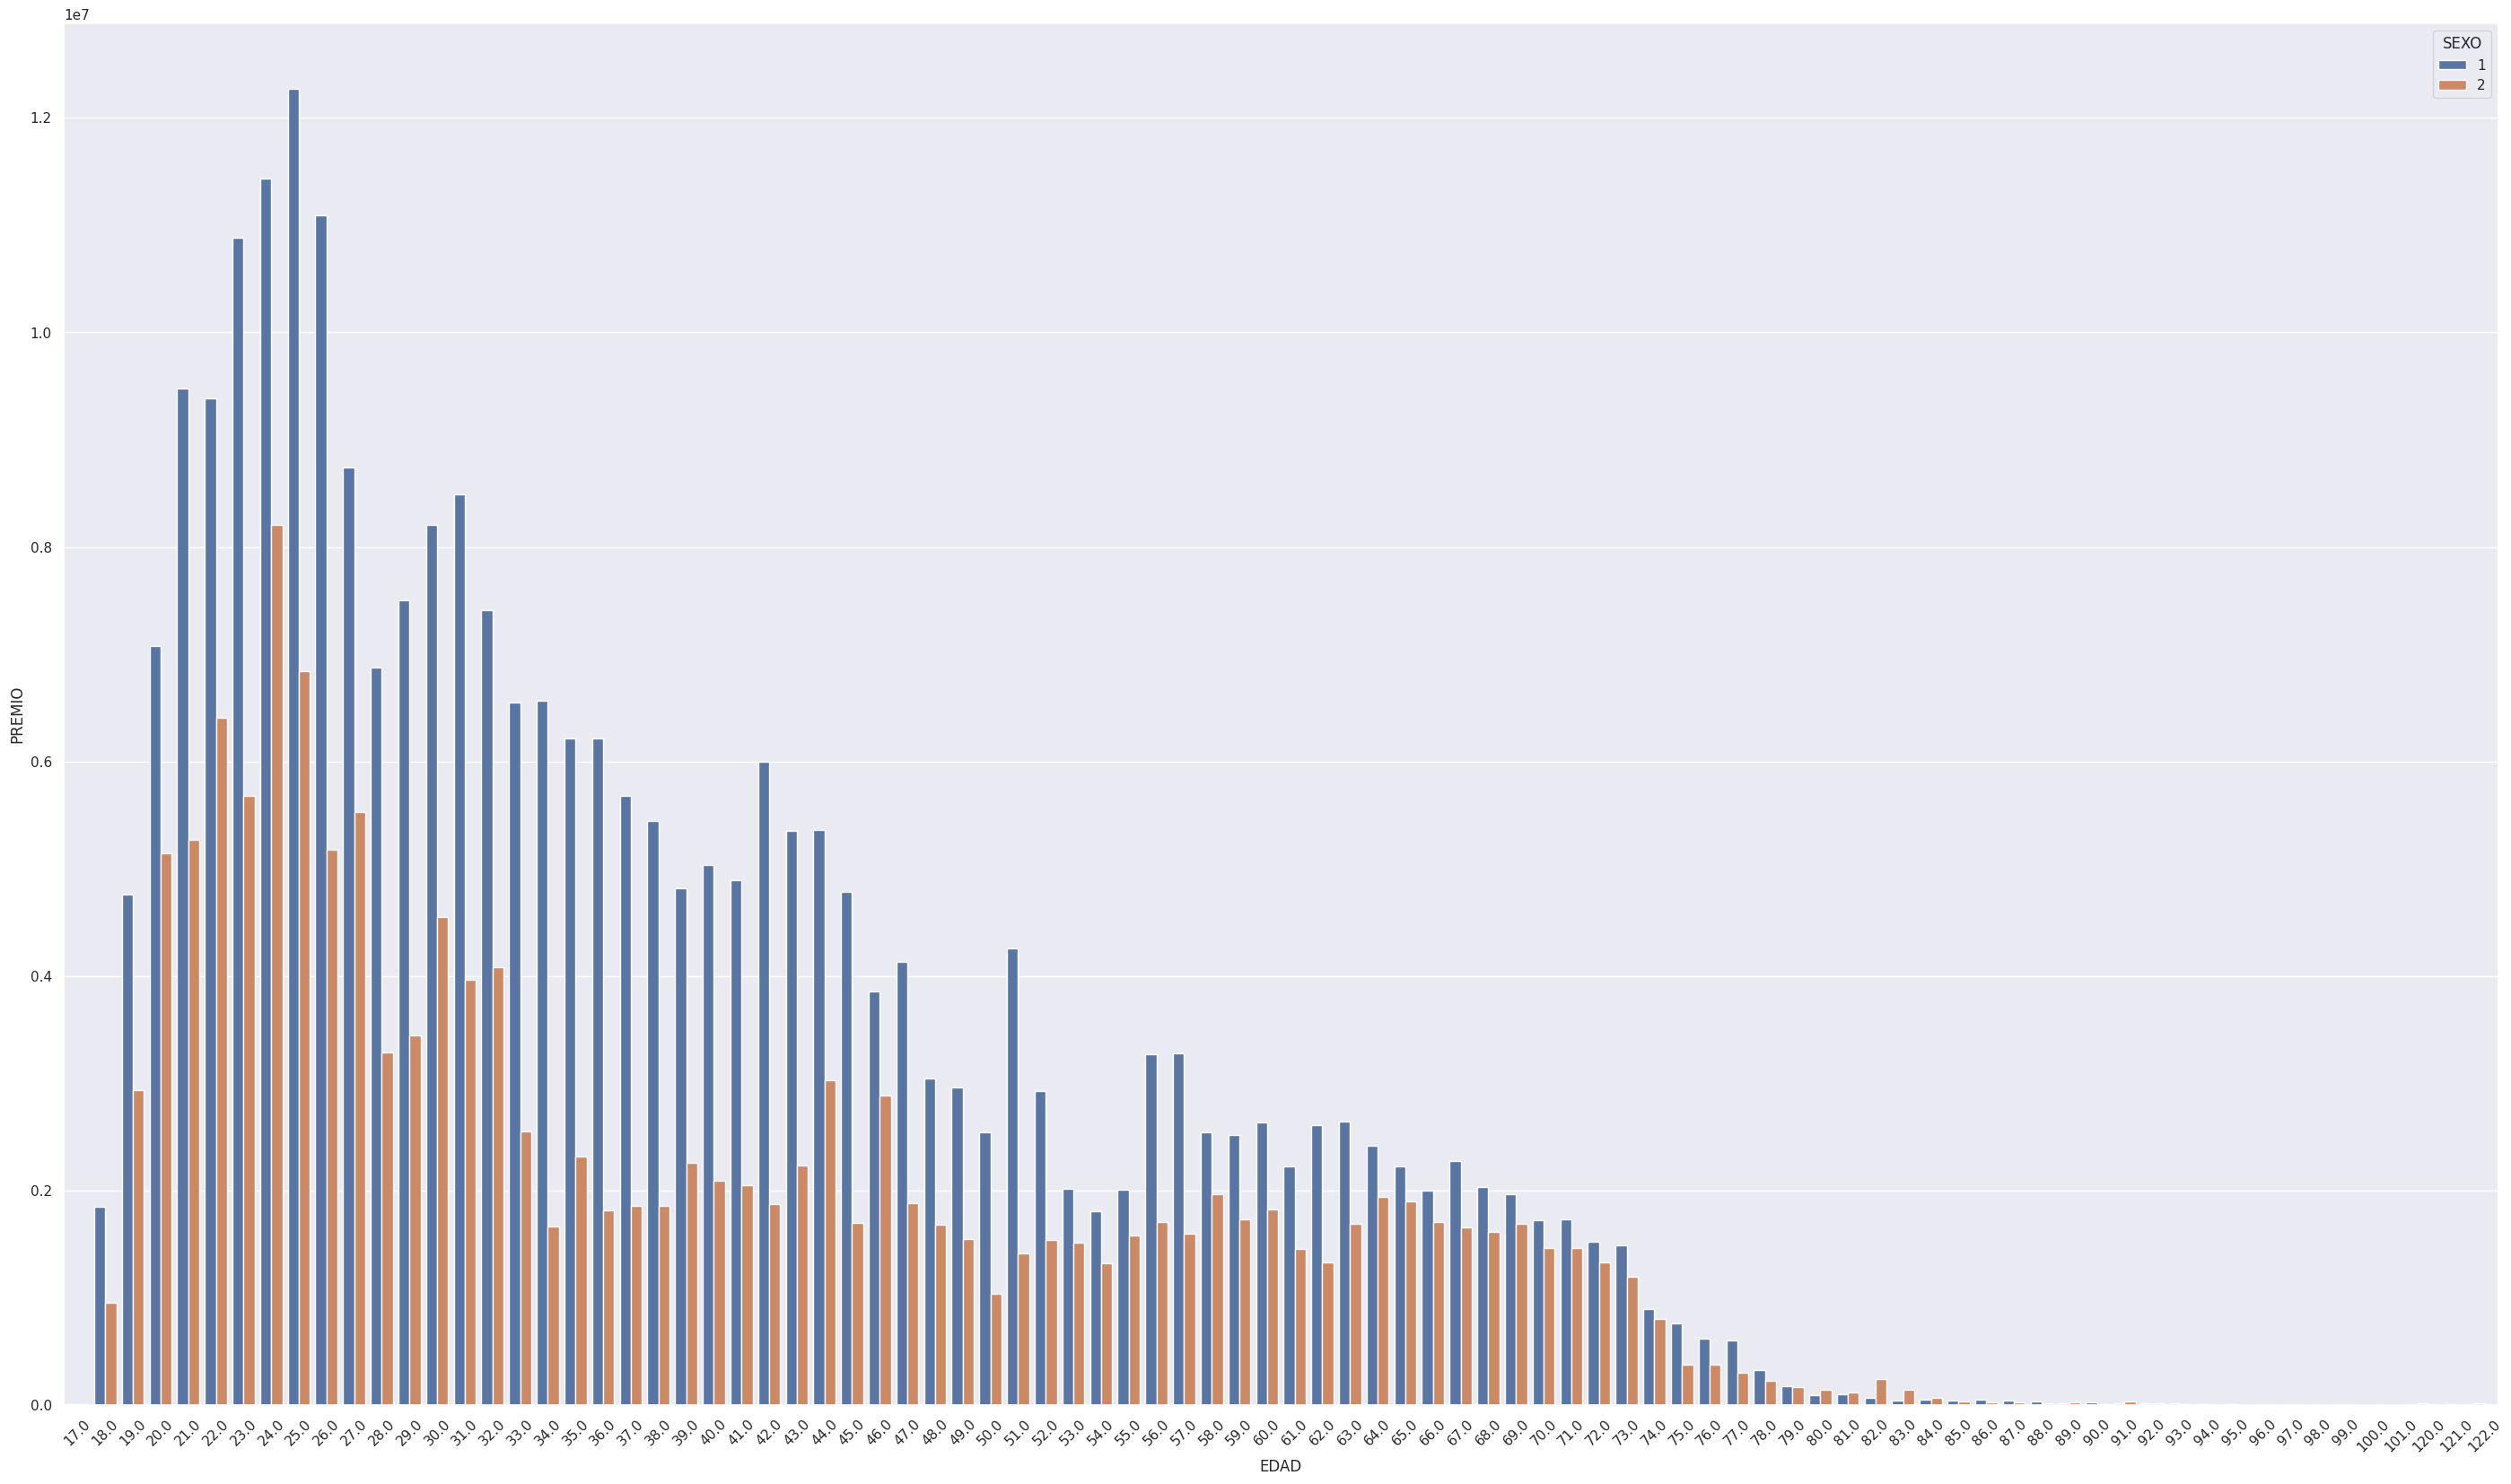

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

df_a=df.loc[df['TIPO DE PERSONA'] == 'F']
df_a['FECHA NACIMIENTO'] = [datetime.strptime(fecha, '%d/%m/%Y').date() for fecha in df_a['FECHA NACIMIENTO']]
df_a['FECHA DE EMISION'] = [datetime.strptime(fecha, '%d/%m/%Y').date() for fecha in df_a['FECHA DE EMISION']]
df_a['EDAD'] = (df_a['FECHA DE EMISION'] - df_a['FECHA NACIMIENTO']).astype('<m8[Y]')

ventas_por_edad_y_sexo = df_a.groupby(['EDAD', 'SEXO'])['PREMIO'].sum().reset_index()
sns.set(rc={'figure.figsize':(35,20)})
sns.barplot(x='EDAD', y='PREMIO', hue='SEXO', data=ventas_por_edad_y_sexo)
plt.xticks(rotation=45)

plt.show()

A continuacion se intenta mostrar en un histograma, la frecuencia de las distintas edades de los tomadores de póliza. Aqui tambien podemos confirmar que entre los 20 y 30 años se dan las mayores ocurrencias, o sea ese rango de edad es el que más clientes tiene

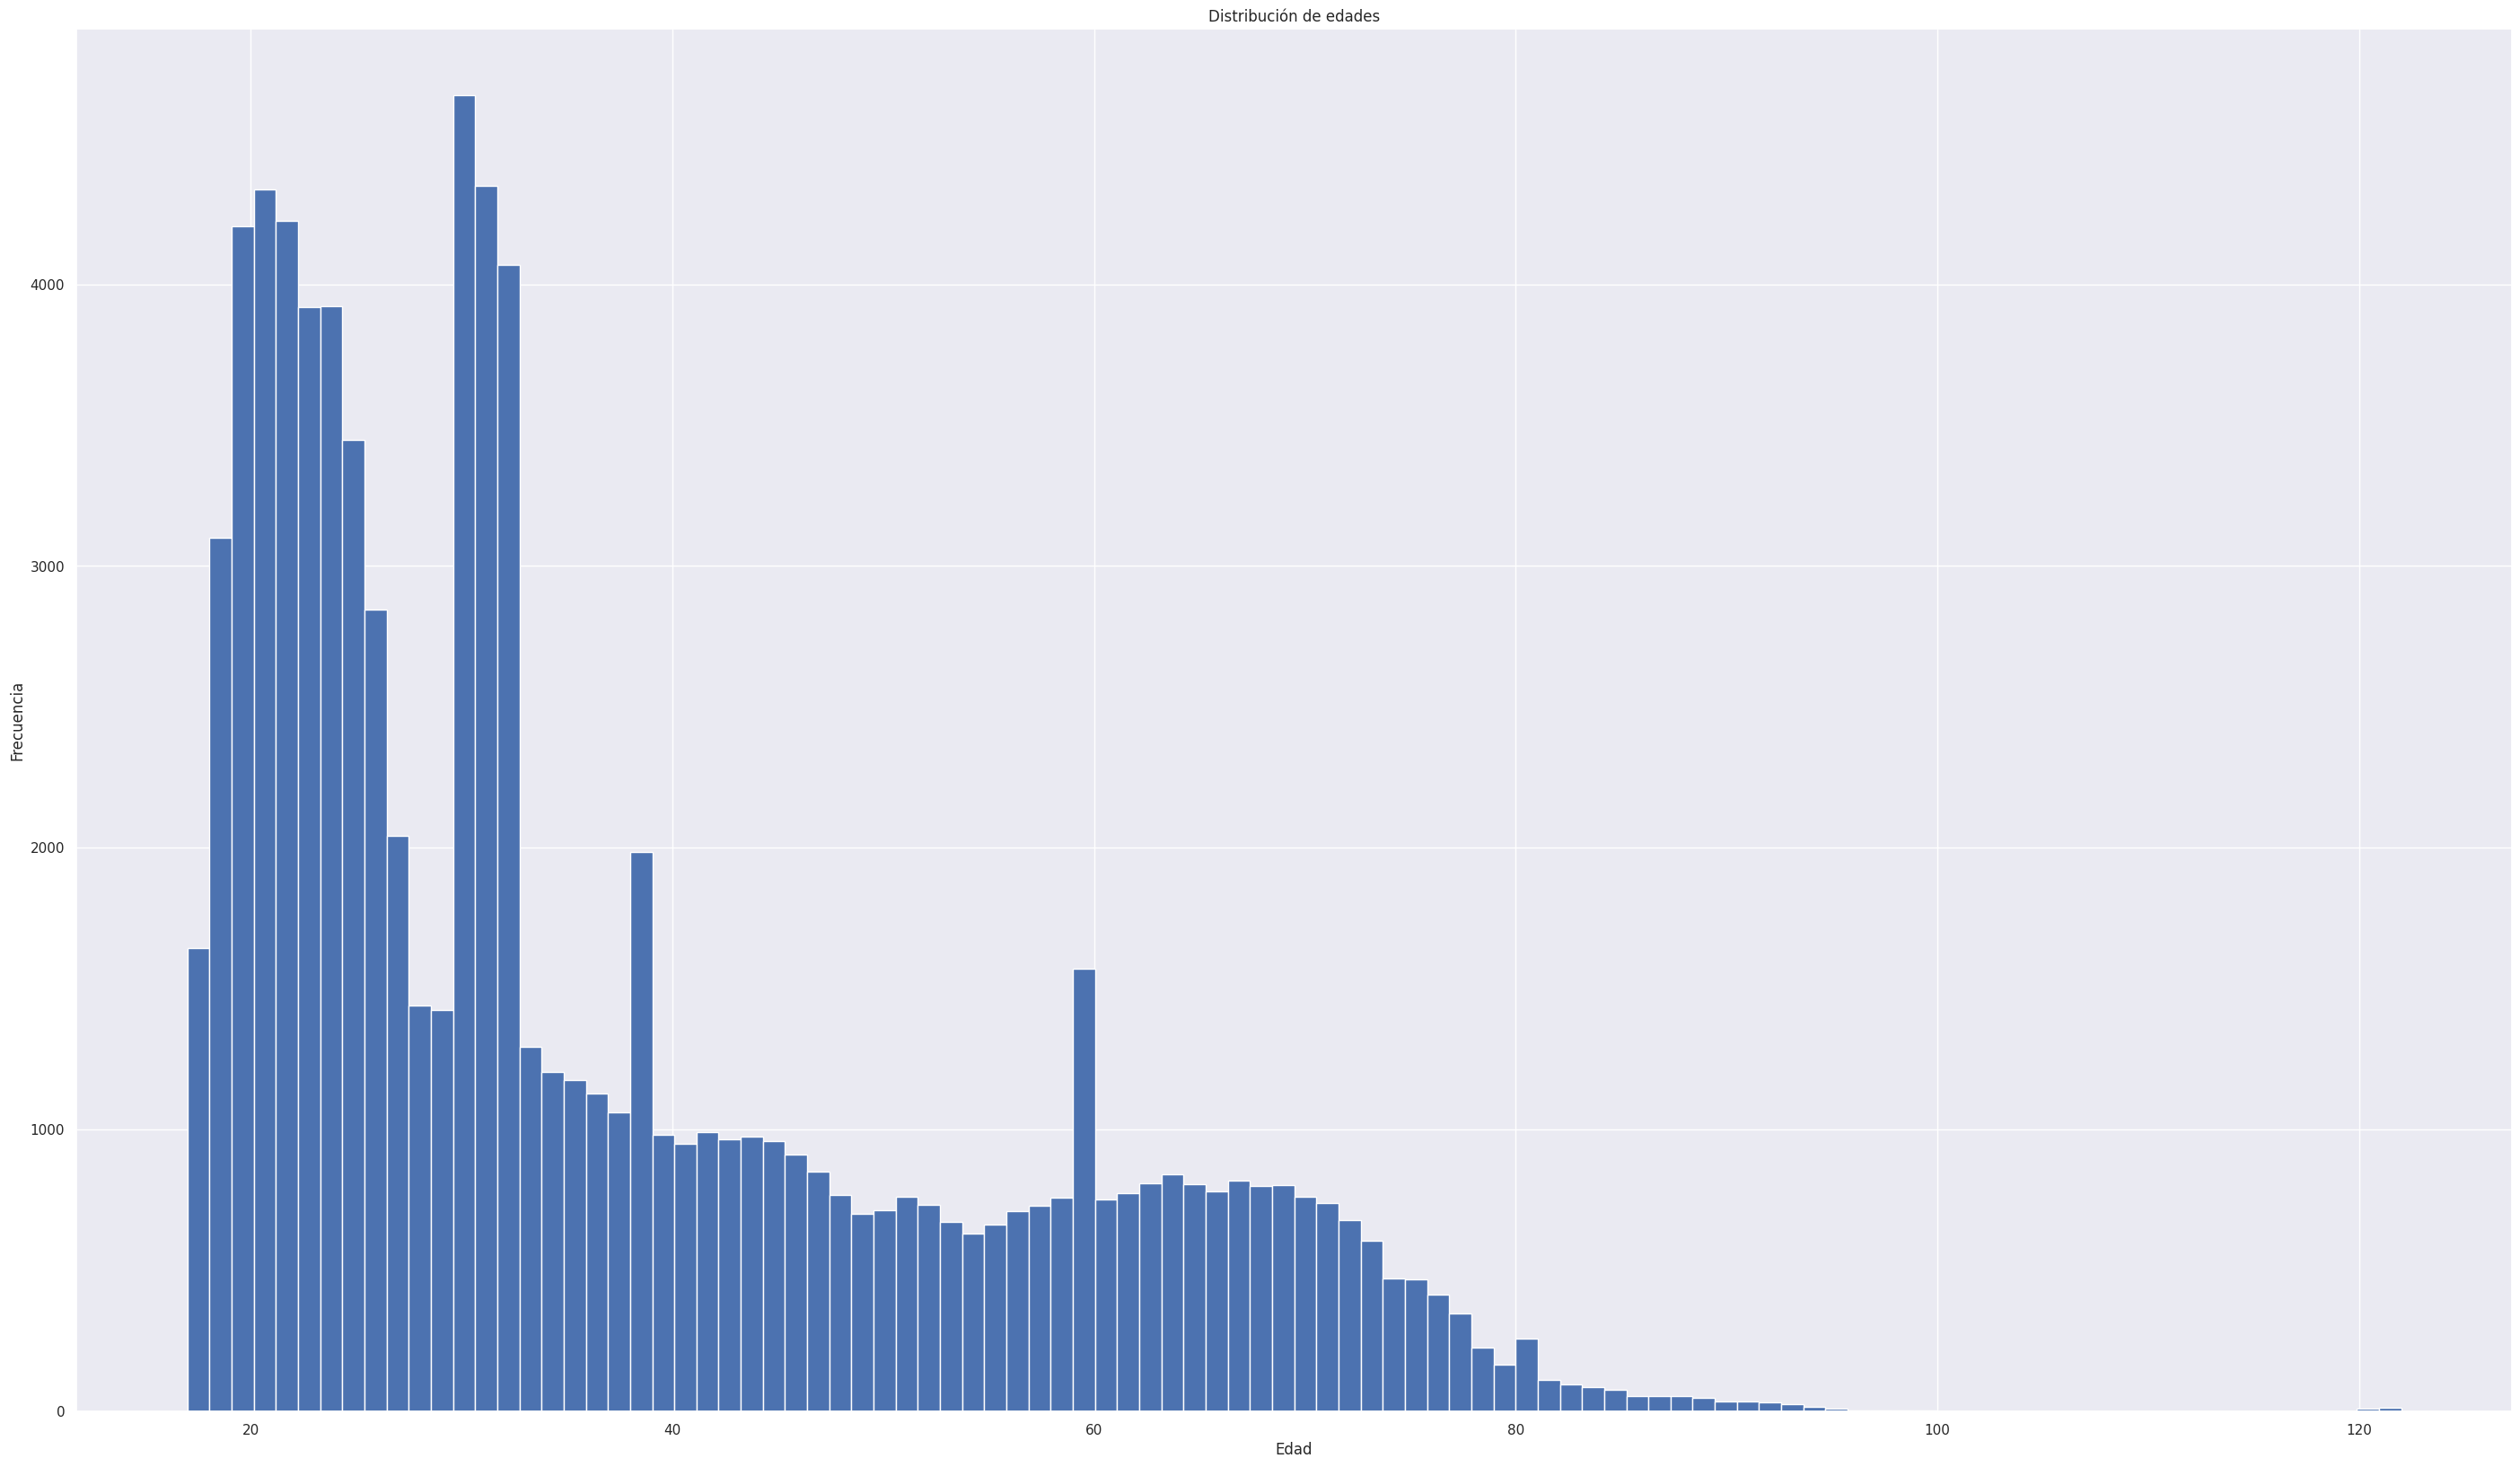

In [38]:

plt.hist(df_a['EDAD'], bins=100)
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

**Analisis Bivariado**

En este gráfico de dispersión, intento ver si hay muchos casos anómalos. Observo en la dispersión que hay muy pocos casos que salen de la mayoría.

Text(0, 0.5, 'Precio de póliza')

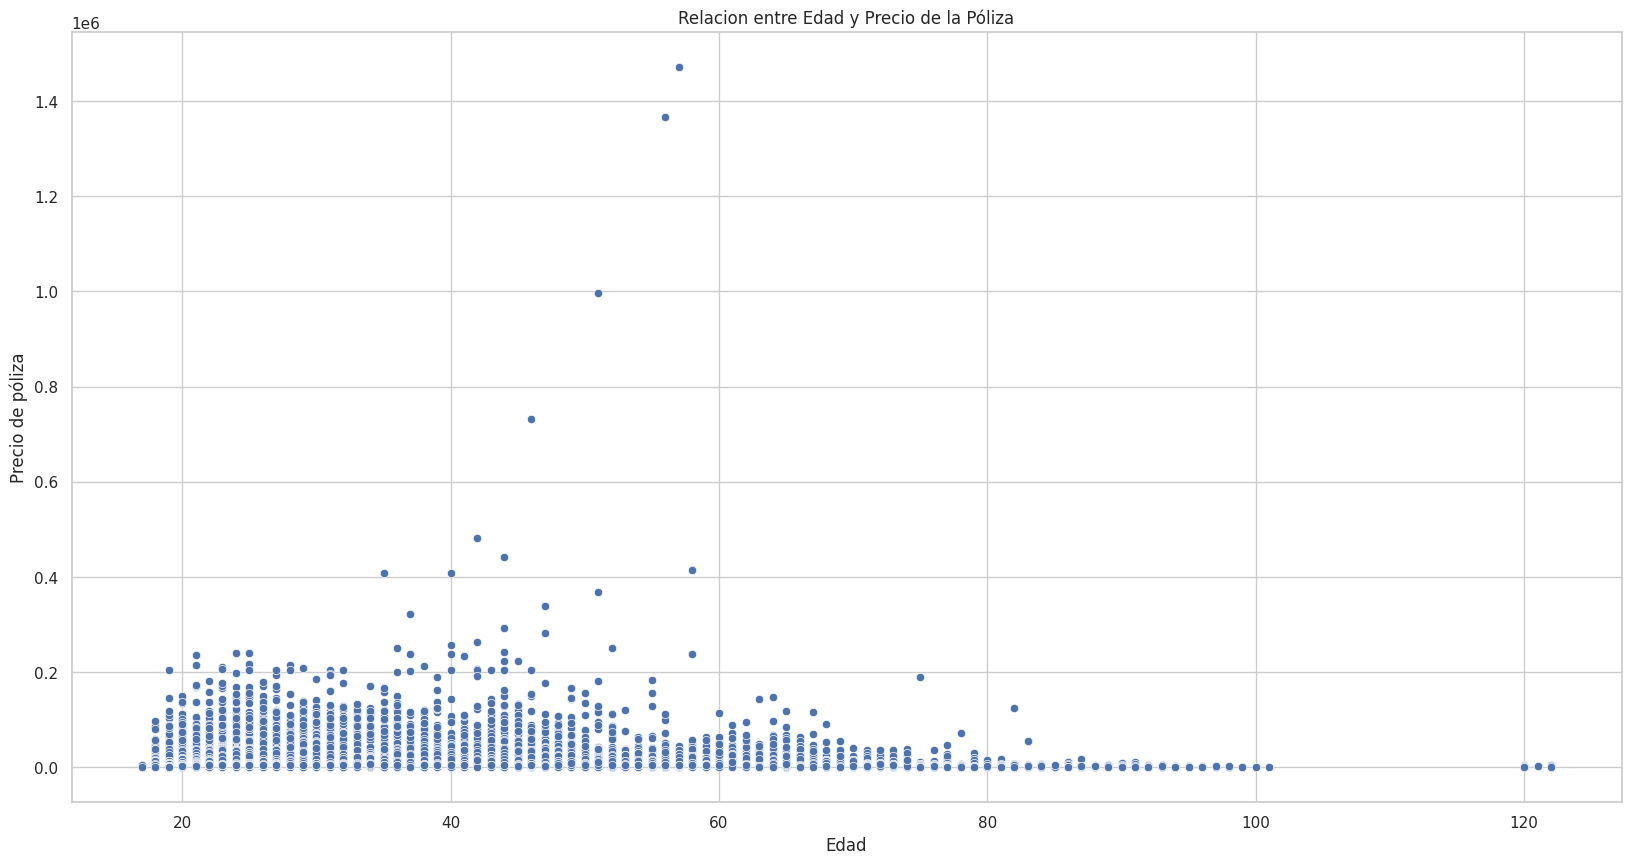

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.scatterplot(x=df_a.EDAD, y= df_a.PREMIO)
plt.title('Relacion entre Edad y Precio de la Póliza')
plt.xlabel('Edad')
plt.ylabel('Precio de póliza')

Por ultimo, generamos un gráfico de Boxplot para poder comparar la cantidad de asegurados y el sexo del tomador respecto al precio de la póliza. Vemos una distribución pareja entre los sexos y la cantidad de asegurados. Vemos que a medida que hay más asegurados, hay un ascenso esperable en el costo de la póliza hasta 11 asegurados, mirando la zona central del bigote para cada cantidad de asegurados.

Text(0, 0.5, 'Precio de poliza')

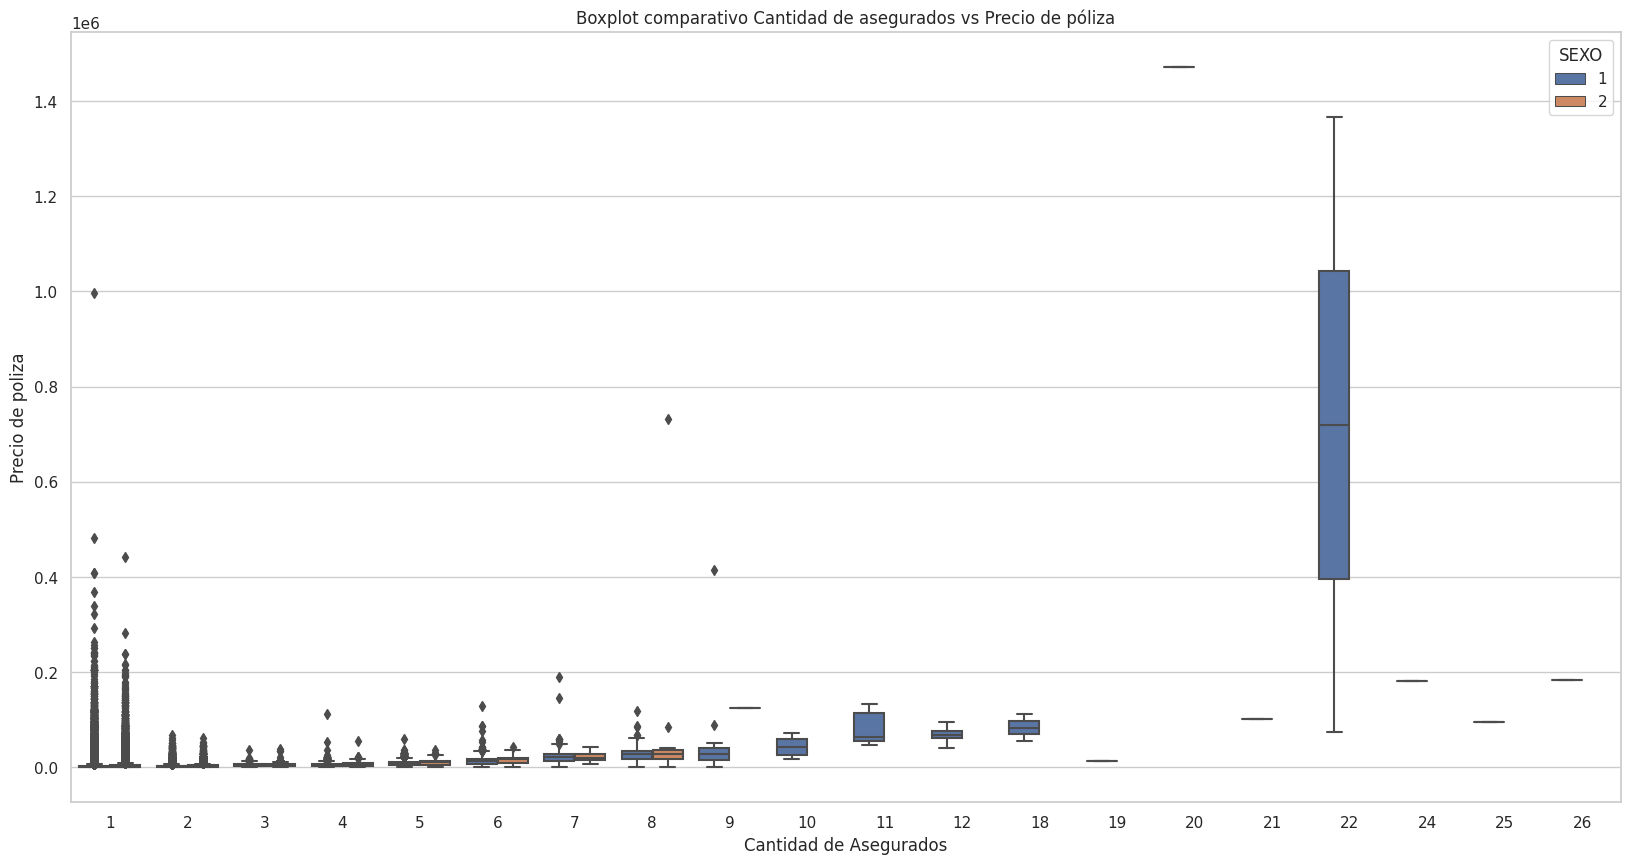

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df_a['CANTIDAD DE ASEGURADOS'], y= df_a.PREMIO, hue=df_a.SEXO)
plt.title('Boxplot comparativo Cantidad de asegurados vs Precio de póliza')
plt.xlabel('Cantidad de Asegurados')
plt.ylabel('Precio de poliza')